In [1]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############
import pickle as pkl
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from equations.class_subcircuit_eq import *
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit


## Subcircuit 1

In [91]:
## Dataset 2

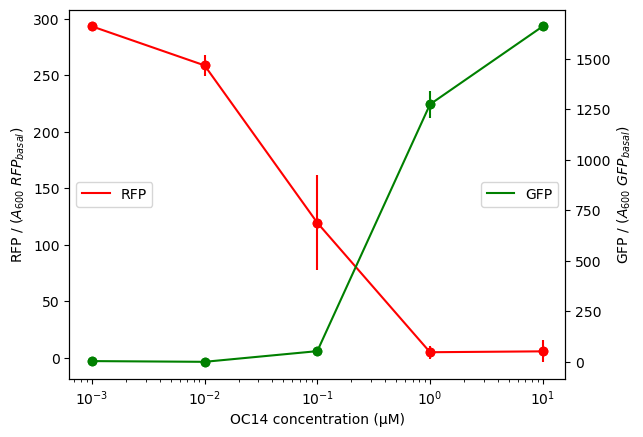

In [2]:
def plotData(inducer, rfpExp_list, gfpExp_list, semRed, semGreen,pad=0.01, inducerName='OC14'):
    fig,ax = plt.subplots()

    ax.plot(inducer,rfpExp_list,label='RFP', c='red')
    ax.scatter(inducer,rfpExp_list, c='red')
    ax.errorbar(inducer,rfpExp_list,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    ax.set_ylabel('RFP / ($A_{600}$ $RFP_{basal})$')
    ax.set_xscale('log')


    ax2=ax.twinx()
    ax2.plot(inducer,gfpExp_list,label='GFP', c='green')
    ax2.scatter(inducer,gfpExp_list, c='green')
    ax2.errorbar(inducer,gfpExp_list,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    ax2.set_ylabel('GFP / ($A_{600}$ $GFP_{basal})$')
    ax.set_xscale('log')

    ax.set_xlabel(f'{inducerName} concentration (µM)')

    plt.show()




# doseResponseExp = pkl.load(open('input/liquid_culture/curatedData/nonTransferred_subcircuit1_circuit14_doseResponseOC14_-0.5ATC.pkl','rb'))
doseResponseExp = pkl.load(open('input/liquid_culture/curatedData/subcircuit1_circuit14_doseResponseOC14_maxATC.pkl','rb'))
OC14_list = np.array(doseResponseExp['OC14']); gfpExp_list = list(doseResponseExp['mean_gfp']); rfpExp_list = list(doseResponseExp['mean_rfp'])
semGreen = doseResponseExp['std_gfp']; semRed = doseResponseExp['std_rfp']


plotData(OC14_list, rfpExp_list, gfpExp_list, semRed, semGreen)
OC14_continuous = np.logspace(-3,1, 100)


In [3]:
import scipy.optimize as optimization
def gfp_steadystate(OC14, Vf,Kvd,Ve,Kfe): 
    muv = 0.0225 ; kv =  0.0183 ;
    nvd=2;nfe=8
    F = 1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd ))
    return F

def rfp_steadystate(OC14, Vf,Kvd,Ve,Kfe): 
    muv = 0.0225 ; kv =  0.0183 ;
    nvd=2;nfe=8

    E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))

    return E


def steadystate(OC14, Vf,Kvd,Ve,Kfe):
  F = gfp_steadystate(OC14[:5],  Vf,Kvd,Ve,Kfe)
  E = rfp_steadystate(OC14[5:],Vf,Kvd,Ve,Kfe)
  FE = np.hstack([F,E])

  return FE


FEdata = np.hstack([gfpExp_list,rfpExp_list])
OC14data_new = np.hstack([OC14_list,OC14_list])
OC14data_continuous= np.hstack([OC14_continuous,OC14_continuous])

popt, pcov = optimization.curve_fit(f=steadystate, xdata=OC14data_new, ydata=FEdata ,p0=[ 7,0.5,3,3],bounds = (0,10000), maxfev = 100000000)

# gfpFit, rfpFit = steadystate(OC14data_new, *popt)
fluorescenceFit = steadystate(OC14data_new, *popt)
fluorescenceFit_continuous = steadystate(OC14data_continuous, *popt)



parametersgreen[1.66489174e+03 4.50510644e-01]
gfpFit = [1.00543233e+00 1.54252399e+00 5.35518930e+01 1.27501004e+03
 1.66079927e+03]


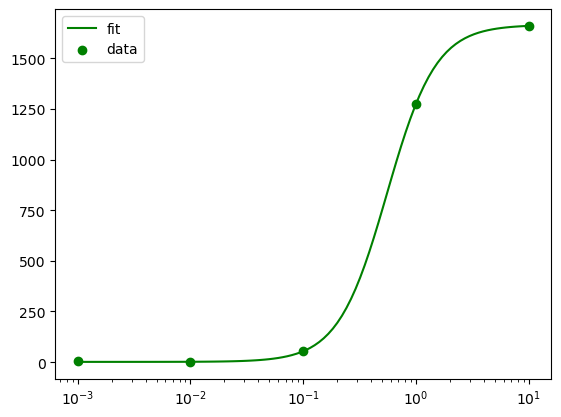

[672.5278669]


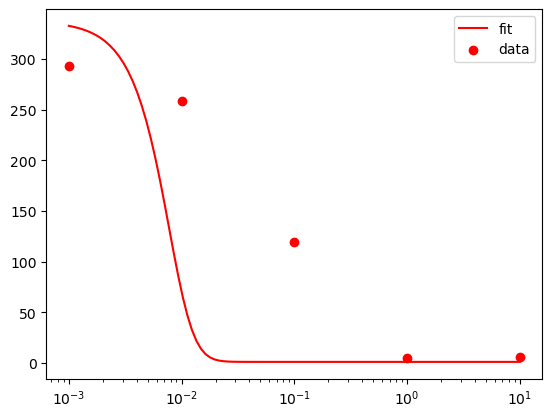

pfit [1.66489174e+03 4.50510644e-01 6.72527867e+02]


In [14]:
from scipy.optimize import curve_fit
OC14_list = np.logspace(-3,1, 5)

OC14_continuous = np.logspace(-3,1, 100)

def gfp_steadystate(OC14,  Vf,Kvd): 
    muv = 0.0225 ; kv =  0.0183 ;
    nvd=2;nfe=5
    F = 1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd ))
    return F

# def rfp_steadystate(F,Ve,Kfe): 
#     nvd=2;nfe=1
#     muv = 0.0225 ; kv =  0.0183 ;
#     E = 1 + Ve*(1/(1+((F/(Kfe+1e-8))**nfe)))
#     # E = 1 + Ve*(1/(1+(Kfe/(F+1e-8))**nfe))

#     # E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))

#     return E


# def gfp_steadystate(OC14,  Vf,Kvd): 
#     muv = 0.0225 ; kv =  0.0183 ;
#     nvd=2;nfe=5
#     F = 1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd ))
#     return F

def rfp_steadystate(F,VeKfe): 
    nvd=2;nfe=5
    muv = 0.0225 ; kv =  0.0183 ;
    E = 1 + VeKfe*(1/(1+((F)**nfe)))
    # E = 1 + Ve*(1/(1+(Kfe/(F+1e-8))**nfe))

    # E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))

    return E

# def rfp_steadystate(OC14,Ve,Kfe): 
#     nvd=2;nfe=8
#     muv = 0.0225 ; kv =  0.0183 ;
#     E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
#     # E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))

# #     return E
# def steadystate(OC14,Vf, Kvd,Ve,Kfe):
def steadystate(OC14,Vf, Kvd,VeKfe):
    nvd=2;nfe=5
    muv = 0.0225 ; kv =  0.0183 ;
    # F = 1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd ))
    # F = 1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd ))
    # E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
    # E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))
    # E = 1 + Ve*(1/(1+(1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd ))/(Kfe+1e-8))**nfe))
    # E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))
    F = gfp_steadystate(OC14,  Vf,Kvd)
    # E = rfp_steadystate(F,Ve,Kfe)
    E = rfp_steadystate(F,VeKfe)
    return F,E




parametersgreen, covariancegfp = curve_fit(gfp_steadystate, OC14_list, gfpExp_list, p0=[ 1500,5],maxfev=1000000000)
# parametersgreen, covariancegfp = curve_fit(rfp_steadystate, OC14_list, gfpExp_list[::-1], p0=[ 3,3], maxfev=1000000000)
print(f'parametersgreen{parametersgreen}')
gfpFit_continous = gfp_steadystate(OC14_continuous, *parametersgreen)
gfpFit = gfp_steadystate(OC14_list, *parametersgreen)
print(f'gfpFit = {gfpFit}')
plt.plot(OC14_continuous,gfpFit_continous , label='fit', c='green')
plt.scatter(OC14_list,gfpExp_list , label='data', c='green')
plt.xscale('log')
plt.legend()
plt.show()

parametersred, covariancerfp = curve_fit(rfp_steadystate, gfpFit, rfpExp_list,  p0=[100],maxfev=1000000000)
print(parametersred)
rfpFit = rfp_steadystate(gfpFit, *parametersred)
rfpFit_continous = rfp_steadystate(gfpFit_continous, *parametersred)
plt.plot(OC14_continuous,rfpFit_continous , label='fit', c='red')
plt.scatter(OC14_list,rfpExp_list , label='data', c='red')
plt.xscale('log')
plt.legend()
plt.show()

pfit = np.concatenate((parametersgreen, parametersred))
print(f'pfit {pfit}')


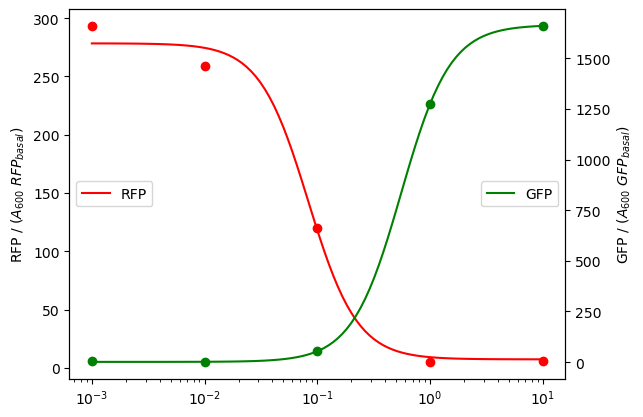

In [6]:
def plotFitvsData(inducer,inducer_continuous, gfpExp_list, rfpExp_list, semGreen, semRed,doseResponseGreen,doseResponseRed,pad=0.01):
    fig,ax = plt.subplots()

    ax.plot(inducer_continuous,doseResponseRed,label='RFP', c='red')
    ax.scatter(inducer,rfpExp_list, c='red')
    # ax.errorbar(inducer,rfpExp_list,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    ax.set_ylabel('RFP / ($A_{600}$ $RFP_{basal})$')
    ax.set_xscale('log')



    ax2=ax.twinx()
    ax2.plot(inducer_continuous,doseResponseGreen,label='GFP', c='green')
    ax2.scatter(inducer,gfpExp_list, c='green')
    # ax2.errorbar(inducer,gfpExp_list,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    ax2.set_ylabel('GFP / ($A_{600}$ $GFP_{basal})$')
    ax.set_xscale('log')


    plt.show()


# plotFitvsData(OC14_list,OC14_continuous, rfpExp_list, gfpExp_list, semRed, semGreen, rfpFit_continous,gfpFit_continous)
plotFitvsData(OC14_list,OC14_continuous, gfpExp_list, rfpExp_list, semGreen, semRed, gfpFit_continous,rfpFit_continous)

In [7]:
import jax

from jax.config import config
config.update("jax_debug_nans", True)


# OC14data_new = np.hstack([OC14_list,OC14_list])


def func(p):
    loss_i = 0

    for count,OC14 in enumerate(OC14_list):
      model = steadystate(OC14,*p)
   
      loss_i+= ((gfpExp_list[count] - model[0])**2 + (rfpExp_list[count] - model[1])**2)
      # loss_i+= (((gfpExp_list[count] - model[0])**2)/(semGreen.values[count]+1e-8)+ ((rfpExp_list[count] - model[1])**2)/(semRed.values[count]+1e-8))
      # loss_i+= (gfpExp_list[count] - model)**2
    
    return loss_i



p1,p2,p3,p4= pfit
hesian = jax.hessian(func)(jax.numpy.array([p1, p2, p3, p4]))
print('hesian')
print(hesian)
hesian = np.array(hesian)
## check if hesian is positive semidefinite (eig must be >0)
import scipy
scipy.linalg.eigvals(hesian)




hesian
[[ 3.1642644e+00 -2.1148977e+03 -3.8306490e-02 -1.5332179e-01]
 [-2.1148975e+03  3.7967765e+06  2.7166406e+02  1.0707773e+03]
 [-3.8306490e-02  2.7166406e+02  4.0822406e+00  2.4698608e+00]
 [-1.5332179e-01  1.0707772e+03  2.4698608e+00  7.1360092e+00]]


array([3.7967785e+06+0.j, 8.2448254e+00+0.j, 1.9347639e+00+0.j,
       2.7032418e+00+0.j], dtype=complex64)

100%|██████████| 1000/1000 [00:11<00:00, 90.14it/s]


[1.66489174e+03 4.50510644e-01 2.84821230e+02 3.74066534e+01]


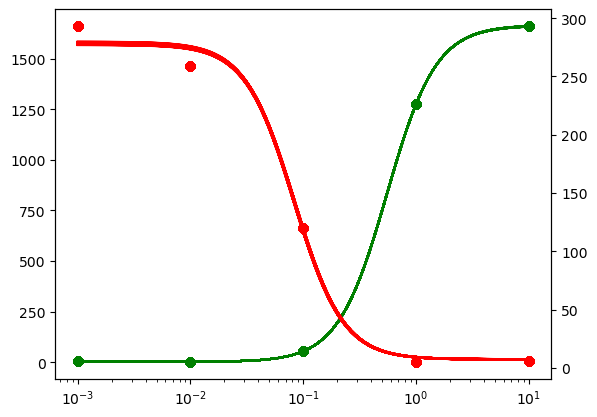

In [8]:
from scipy.stats import multivariate_normal
from tqdm import tqdm 
C14_continuous = np.logspace(-3,1,100)
covarianceM = np.linalg.inv(hesian)
var = multivariate_normal(mean=pfit, cov=covarianceM)
pfit_hesian = var.rvs(size=1000)

fig,ax = plt.subplots()
ax2=ax.twinx()
for p in tqdm(pfit_hesian):
    # if np.all(p>0):
    # steadystate(OC14_continuous, *p)
    ax.plot(OC14_continuous, steadystate(OC14_continuous, *p)[0], c='green', alpha=0.1)
    ax2.plot(OC14_continuous, steadystate(OC14_continuous, *p)[1], c='red', alpha=1)
    ax.scatter(OC14_list,gfpExp_list , label='data', c='green')
    ax2.scatter(OC14_list,rfpExp_list , label='data', c='red')
    plt.xscale('log')
        # print(func(p), p)
pfit_hesian

print(pfit)

/Users/mo2016/opt/anaconda3/envs/condaenv/lib/python3.8/site-packages/scipy/stats/_multivariate.py:653: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
100%|██████████| 100/100 [00:00<00:00, 211.71it/s]


[1.66489174e+03 4.50510644e-01 2.84821230e+02 3.74066534e+01]


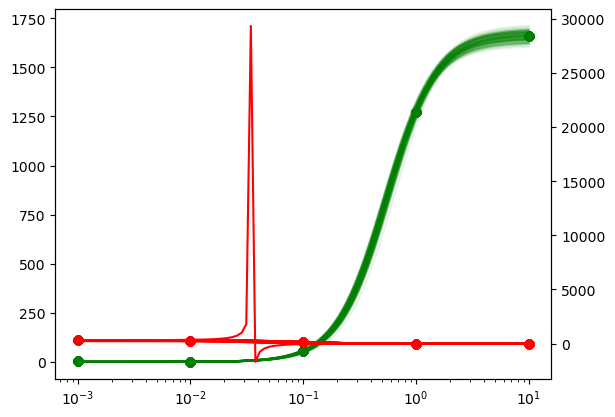

In [9]:
from scipy.stats import multivariate_normal
from tqdm import tqdm 
C14_continuous = np.logspace(-3,1,100)
covarianceM = np.linalg.inv(hesian)
var = multivariate_normal(mean=pfit, cov=1000*covarianceM)
pfit_hesian = var.rvs(size=100)

fig,ax = plt.subplots()
ax2=ax.twinx()
for p in tqdm(pfit_hesian):
    # if np.all(p>0):
    # steadystate(OC14_continuous, *p)
    ax.plot(OC14_continuous, steadystate(OC14_continuous, *p)[0], c='green', alpha=0.1)
    ax2.plot(OC14_continuous, steadystate(OC14_continuous, *p)[1], c='red', alpha=1)
    ax.scatter(OC14_list,gfpExp_list , label='data', c='green')
    ax2.scatter(OC14_list,rfpExp_list , label='data', c='red')
    plt.xscale('log')
        # print(func(p), p)
pfit_hesian

print(pfit)

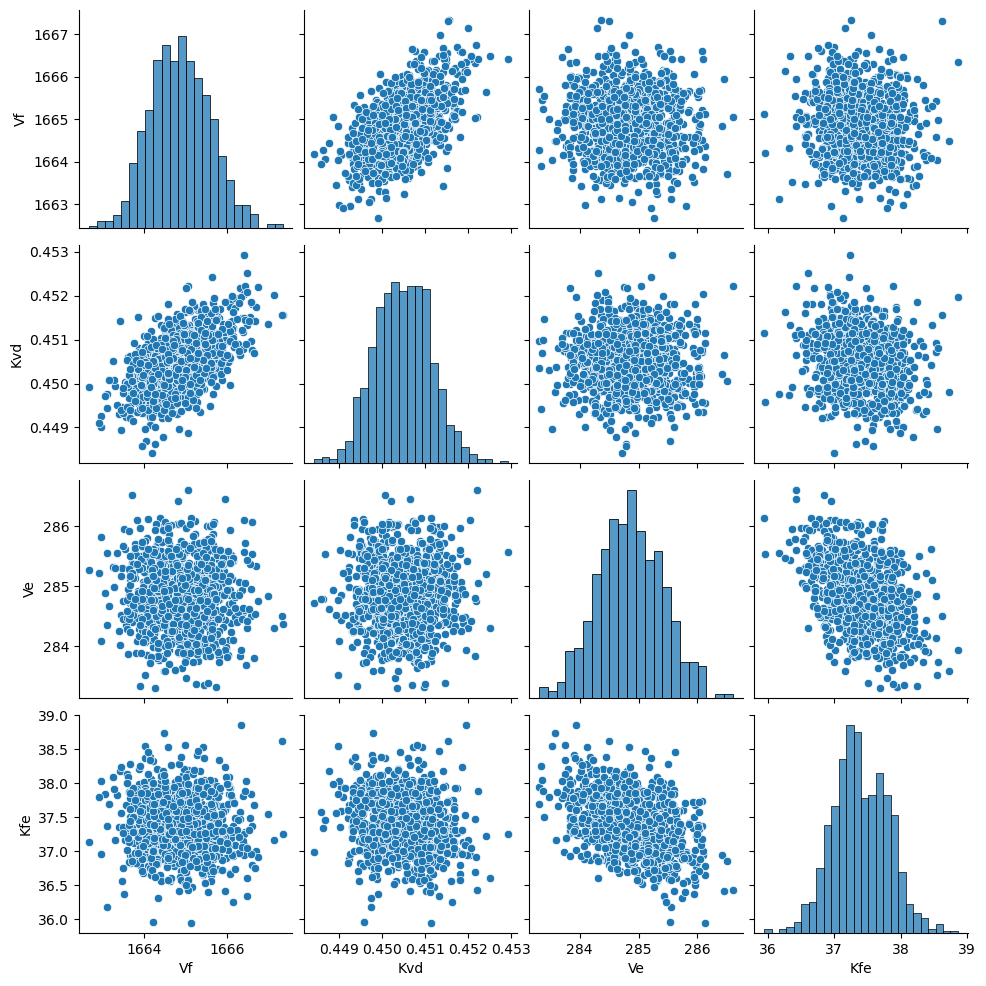

In [102]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame(pfit_hesian, columns=['Vf', 'Kvd', 'Ve', 'Kfe'])
sns.pairplot(df)

## Dataset 2

In [15]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############
import pickle as pkl
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from equations.class_subcircuit_eq import *
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit


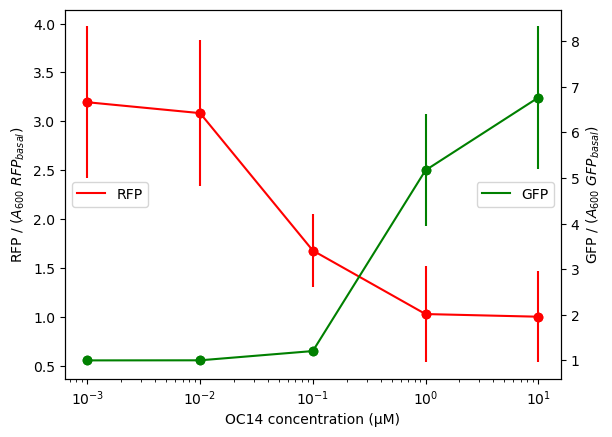

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [16]:

def plotData(inducer, rfpExp_list, gfpExp_list, semRed, semGreen,pad=0.01, inducerName='OC14'):
    fig,ax = plt.subplots()

    ax.plot(inducer,rfpExp_list,label='RFP', c='red')
    ax.scatter(inducer,rfpExp_list, c='red')
    ax.errorbar(inducer,rfpExp_list,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    ax.set_ylabel('RFP / ($A_{600}$ $RFP_{basal})$')
    ax.set_xscale('log')


    ax2=ax.twinx()
    ax2.plot(inducer,gfpExp_list,label='GFP', c='green')
    ax2.scatter(inducer,gfpExp_list, c='green')
    ax2.errorbar(inducer,gfpExp_list,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    ax2.set_ylabel('GFP / ($A_{600}$ $GFP_{basal})$')
    ax.set_xscale('log')

    ax.set_xlabel(f'{inducerName} concentration (µM)')

    plt.show()

doseResponseExp = pkl.load(open('input/liquid_culture/curatedData/nonTransferred_subcircuit1_circuit14_doseResponseOC14_-0.5ATC.pkl','rb'))
# doseResponseExp = pkl.load(open('input/liquid_culture/curatedData/subcircuit1_circuit14_doseResponseOC14_maxATC.pkl','rb'))
OC14_list = np.array(doseResponseExp['OC14']); gfpExp_list = list(doseResponseExp['mean_gfp']); rfpExp_list = list(doseResponseExp['mean_rfp'])
semGreen = doseResponseExp['std_gfp']; semRed = doseResponseExp['std_rfp']


plotData(OC14_list, rfpExp_list, gfpExp_list, semRed, semGreen)
OC14_list

In [4]:
semRed.values

array([0.77704325, 0.74489917, 0.37143821, 0.49400764, 0.46665104])

parametersgreen[5.54811985 0.41661682]
gfpFit = [1.00002117 1.00211393 1.20368998 5.39495705 6.5336006 ]


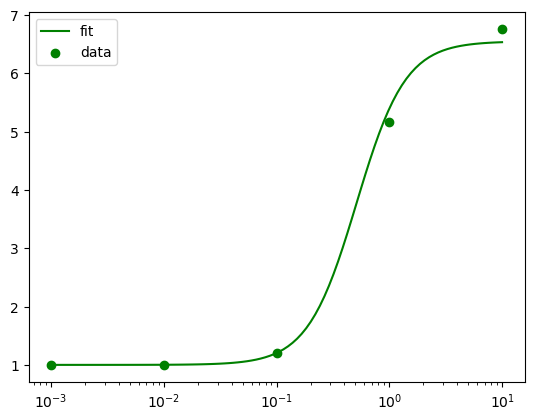

[3.51980519]


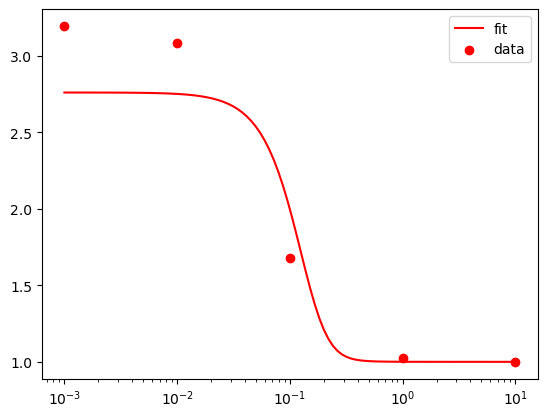

pfit [5.54811985 0.41661682 3.51980519]


In [17]:
from scipy.optimize import curve_fit
OC14_list = np.logspace(-3,1, 5)

OC14_continuous = np.logspace(-3,1, 100)

def gfp_steadystate(OC14,  Vf,Kvd): 
    muv = 0.0225 ; kv =  0.0183 ;
    nvd=2;nfe=5
    F = 1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd ))
    return F

def rfp_steadystate(F,Ve,Kfe): 
    nvd=2;nfe=5
    muv = 0.0225 ; kv =  0.0183 ;
    E = 1 + Ve*(1/(1+((F/(Kfe+1e-8))**nfe)))
    # E = 1 + Ve*(1/(1+(Kfe/(F+1e-8))**nfe))

    # E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))

    return E

def rfp_steadystate(F,VeKfe): 
    nvd=2;nfe=5
    muv = 0.0225 ; kv =  0.0183 ;
    E = 1 + VeKfe*(1/(1+((F)**nfe)))
    # E = 1 + Ve*(1/(1+(Kfe/(F+1e-8))**nfe))

    # E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))

    return E


# def rfp_steadystate(OC14,Ve,Kfe): 
#     nvd=2;nfe=8
#     muv = 0.0225 ; kv =  0.0183 ;
#     E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
#     # E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))

#     return E
def steadystate(OC14,Vf, Kvd,Ve,Kfe):
    nvd=2;nfe=5
    muv = 0.0225 ; kv =  0.0183 ;
    # F = 1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd ))
    # F = 1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd ))
    # E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
    # E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))
    # E = 1 + Ve*(1/(1+(1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd ))/(Kfe+1e-8))**nfe))
    # E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))
    F = gfp_steadystate(OC14,  Vf,Kvd)
    E = rfp_steadystate(F,Ve,Kfe)
    return F,E

def steadystate(OC14,Vf, Kvd,VeKfe):
    nvd=2;nfe=5
    muv = 0.0225 ; kv =  0.0183 ;
    # F = 1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd ))
    # F = 1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd ))
    # E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
    # E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))
    # E = 1 + Ve*(1/(1+(1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd ))/(Kfe+1e-8))**nfe))
    # E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))
    F = gfp_steadystate(OC14,  Vf,Kvd)
    E = rfp_steadystate(F,VeKfe)
    return F,E



parametersgreen, covariancegfp = curve_fit(gfp_steadystate, OC14_list, gfpExp_list, p0=[ 7,5], bounds = (0,100), sigma = semGreen.values, maxfev=1000000000)
# parametersgreen, covariancegfp = curve_fit(gfp_steadystate, OC14_list, gfpExp_list, p0=[ 7,5], bounds = (0,100),  maxfev=1000000000)
# parametersgreen, covariancegfp = curve_fit(rfp_steadystate, OC14_list, gfpExp_list[::-1], p0=[ 3,3], maxfev=1000000000)
print(f'parametersgreen{parametersgreen}')
gfpFit_continous = gfp_steadystate(OC14_continuous, *parametersgreen)
gfpFit = gfp_steadystate(OC14_list, *parametersgreen)
print(f'gfpFit = {gfpFit}')
plt.plot(OC14_continuous,gfpFit_continous , label='fit', c='green')
plt.scatter(OC14_list,gfpExp_list , label='data', c='green')
plt.xscale('log')
plt.legend()
plt.show()

parametersred, covariancerfp = curve_fit(rfp_steadystate, gfpFit, rfpExp_list,  p0=[10],bounds = (0,100), sigma = semRed.values, maxfev=1000000000)
# parametersred, covariancerfp = curve_fit(rfp_steadystate, gfpFit, rfpExp_list,  p0=[10, 1],bounds = (0,100),  maxfev=1000000000)
print(parametersred)
rfpFit = rfp_steadystate(gfpFit, *parametersred)
rfpFit_continous = rfp_steadystate(gfpFit_continous, *parametersred)
plt.plot(OC14_continuous,rfpFit_continous , label='fit', c='red')
plt.scatter(OC14_list,rfpExp_list , label='data', c='red')
plt.xscale('log')
plt.legend()
plt.show()

pfit = np.concatenate((parametersgreen, parametersred))
print(f'pfit {pfit}')


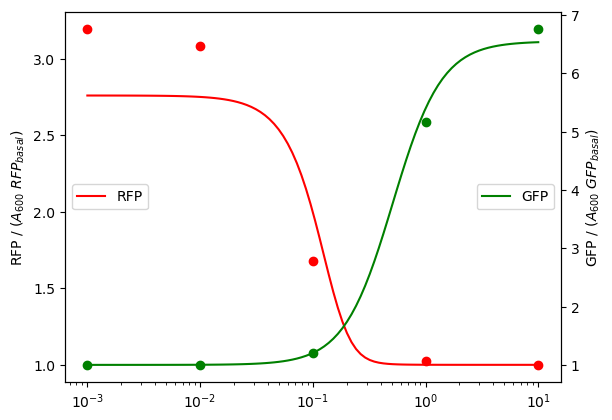

In [18]:
def plotFitvsData(inducer,inducer_continuous, gfpExp_list, rfpExp_list, semGreen, semRed,doseResponseGreen,doseResponseRed,pad=0.01):
    fig,ax = plt.subplots()

    ax.plot(inducer_continuous,doseResponseRed,label='RFP', c='red')
    ax.scatter(inducer,rfpExp_list, c='red')
    # ax.errorbar(inducer,rfpExp_list,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    ax.set_ylabel('RFP / ($A_{600}$ $RFP_{basal})$')
    ax.set_xscale('log')


    ax2=ax.twinx()
    ax2.plot(inducer_continuous,doseResponseGreen,label='GFP', c='green')
    ax2.scatter(inducer,gfpExp_list, c='green')
    # ax2.errorbar(inducer,gfpExp_list,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    ax2.set_ylabel('GFP / ($A_{600}$ $GFP_{basal})$')
    ax.set_xscale('log')


    plt.show()


# plotFitvsData(OC14_list,OC14_continuous, rfpExp_list, gfpExp_list, semRed, semGreen, rfpFit_continous,gfpFit_continous)
plotFitvsData(OC14_list,OC14_continuous, gfpExp_list, rfpExp_list, semGreen, semRed, gfpFit_continous,rfpFit_continous)

Step 2: Hesian


In [19]:
import jax

from jax.config import config
config.update("jax_debug_nans", True)


# OC14data_new = np.hstack([OC14_list,OC14_list])


def func(p):
    loss_i = 0

    for count,OC14 in enumerate(OC14_list):
      model = steadystate(OC14,*p)
   
      # loss_i+= ((gfpExp_list[count] - model[0])**2 + (rfpExp_list[count] - model[1])**2)
      loss_i+= (((gfpExp_list[count] - model[0])**2)/(semGreen.values[count]+1e-8)**2+ ((rfpExp_list[count] - model[1])**2)/(semRed.values[count]+1e-8)**2)
      # loss_i+= (gfpExp_list[count] - model)**2
    
    return loss_i



p1,p2,p3= pfit
hesian = jax.hessian(func)(jax.numpy.array([p1, p2, p3]))
print('hesian')
print(hesian)
hesian = np.array(hesian)
## check if hesian is positive semidefinite (eig must be >0)
import scipy
print('')
print('hesian eigenvalues')
print(scipy.linalg.eigvals(hesian))




hesian
[[ 3.7541616e+00 -5.6452896e+01 -5.9467256e-01]
 [-5.6452892e+01  1.3163265e+03  1.5260156e+01]
 [-5.9467250e-01  1.5260159e+01  2.8850672e+00]]

hesian eigenvalues
[1318.9275   +0.j    1.3279884+0.j    2.7104948+0.j]


In [107]:
scipy.linalg.eigvals(covarianceM)


array([5.1680428e-01+0.j, 3.6992565e-01+0.j, 1.2128824e-01+0.j,
       2.6497082e-07+0.j], dtype=complex64)

/Users/mo2016/opt/anaconda3/envs/condaenv/lib/python3.8/site-packages/scipy/stats/_multivariate.py:653: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
100%|██████████| 100/100 [00:00<00:00, 273.61it/s]


[5.54811985 0.41661682 3.51980519]


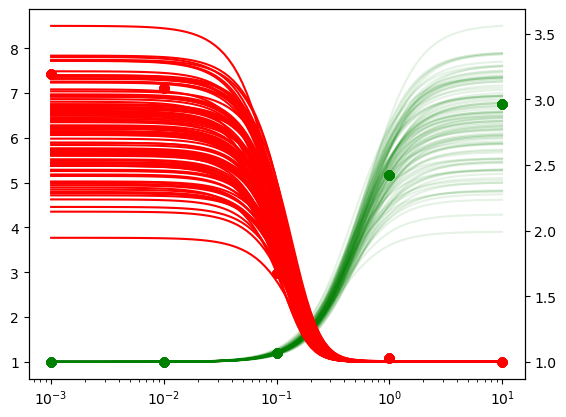

In [20]:
from scipy.stats import multivariate_normal
from tqdm import tqdm 
C14_continuous = np.logspace(-3,1,100)
covarianceM = np.linalg.inv(hesian)
var = multivariate_normal(mean=pfit, cov=covarianceM)
pfit_hesian = var.rvs(size=100)

fig,ax = plt.subplots()
ax2=ax.twinx()
for p in tqdm(pfit_hesian):
    if np.all(p>0):
        # steadystate(OC14_continuous, *p)
        ax.plot(OC14_continuous, steadystate(OC14_continuous, *p)[0], c='green', alpha=0.1)
        ax2.plot(OC14_continuous, steadystate(OC14_continuous, *p)[1], c='red', alpha=1)
        ax.scatter(OC14_list,gfpExp_list , label='data', c='green')
        ax2.scatter(OC14_list,rfpExp_list , label='data', c='red')
        plt.xscale('log')
            # print(func(p), p)
pfit_hesian

print(pfit)

100%|██████████| 100/100 [00:00<00:00, 585.58it/s]


[5.54811985 0.41661682 3.51980519]


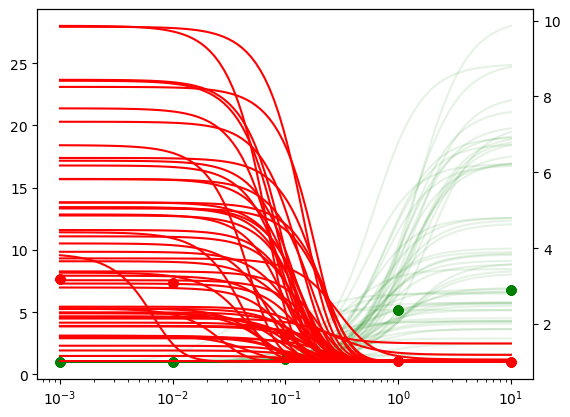

In [21]:
from scipy.stats import multivariate_normal
from tqdm import tqdm 
C14_continuous = np.logspace(-3,1,100)
covarianceM = np.linalg.inv(hesian)
var = multivariate_normal(mean=pfit, cov=100*covarianceM)
pfit_hesian = var.rvs(size=100)

fig,ax = plt.subplots()
ax2=ax.twinx()
for p in tqdm(pfit_hesian):
    if np.all(p>0):
        # steadystate(OC14_continuous, *p)
        ax.plot(OC14_continuous, steadystate(OC14_continuous, *p)[0], c='green', alpha=0.1)
        ax2.plot(OC14_continuous, steadystate(OC14_continuous, *p)[1], c='red', alpha=1)
        ax.scatter(OC14_list,gfpExp_list , label='data', c='green')
        ax2.scatter(OC14_list,rfpExp_list , label='data', c='red')
        plt.xscale('log')
            # print(func(p), p)
pfit_hesian

print(pfit)

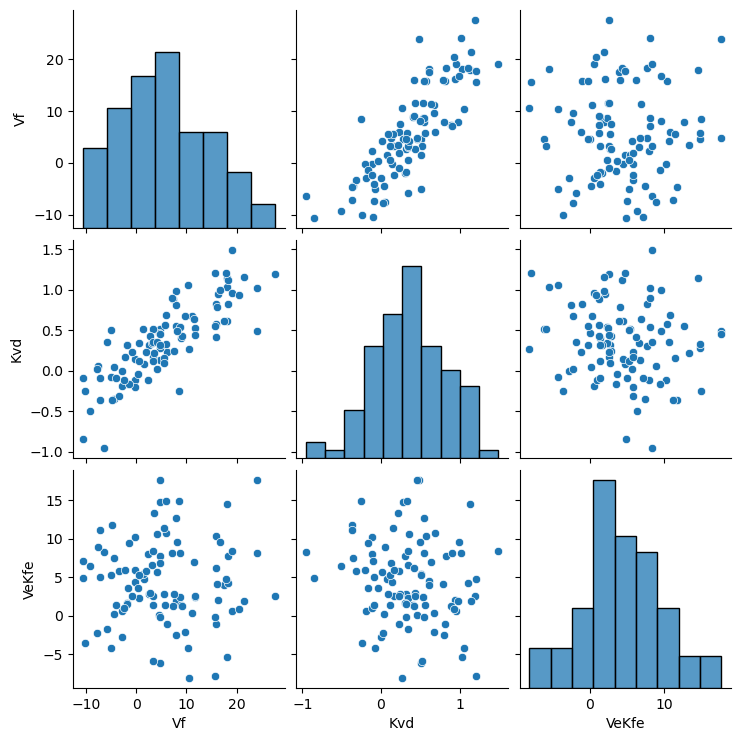

In [22]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame(pfit_hesian, columns=['Vf', 'Kvd', 'VeKfe'])
sns.pairplot(df)

## Subcircuit 3

## Dataset 1

In [1]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############
import pickle as pkl
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from equations.class_subcircuit_eq import *
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit


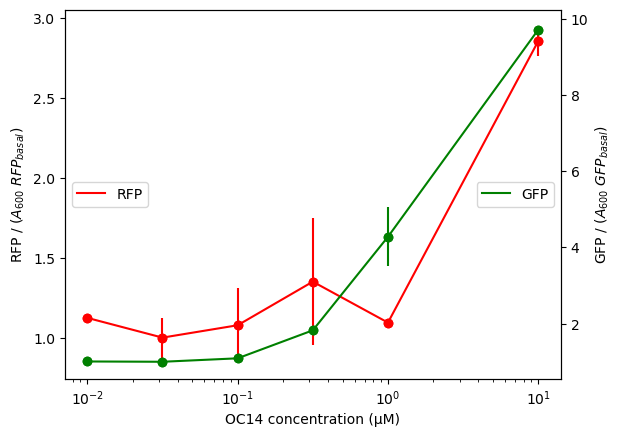

array([ 0.01      ,  0.03162278,  0.1       ,  0.31622777,  1.        ,
       10.        ])

In [8]:
def plotData(inducer, rfpExp_list, gfpExp_list, semRed, semGreen,pad=0.01, inducerName='OC14'):
    fig,ax = plt.subplots()

    ax.plot(inducer,rfpExp_list,label='RFP', c='red')
    ax.scatter(inducer,rfpExp_list, c='red')
    ax.errorbar(inducer,rfpExp_list,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    ax.set_ylabel('RFP / ($A_{600}$ $RFP_{basal})$')
    ax.set_xscale('log')


    ax2=ax.twinx()
    ax2.plot(inducer,gfpExp_list,label='GFP', c='green')
    ax2.scatter(inducer,gfpExp_list, c='green')
    ax2.errorbar(inducer,gfpExp_list,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    ax2.set_ylabel('GFP / ($A_{600}$ $GFP_{basal})$')
    ax.set_xscale('log')

    ax.set_xlabel(f'{inducerName} concentration (µM)')

    plt.show()




doseResponseExp = pkl.load(open('input/liquid_culture/curatedData/nonTransferred_subcircuit3_circuit14_doseResponseOC14_-0.5ATC.pkl','rb'))
# doseResponseExp = pkl.load(open('input/liquid_culture/curatedData/subcircuit3_circuit14_doseResponseOC14_maxATC.pkl','rb'))
OC14_list = np.array(doseResponseExp['OC14']); gfpExp_list = list(doseResponseExp['mean_gfp']); rfpExp_list = list(doseResponseExp['mean_rfp'])
semGreen = doseResponseExp['std_gfp']; semRed = doseResponseExp['std_rfp']

OC14_list[0] = 1.00000000e-02

plotData(OC14_list, rfpExp_list, gfpExp_list, semRed, semGreen)
OC14_list

array([1.00000000e-03, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 1.00000000e+01])

parametersgreen[8.79023559 0.85467838]
gfpFit = [1.00079605 1.00795342 1.07888995 1.72993539 5.17737017 9.69422938]


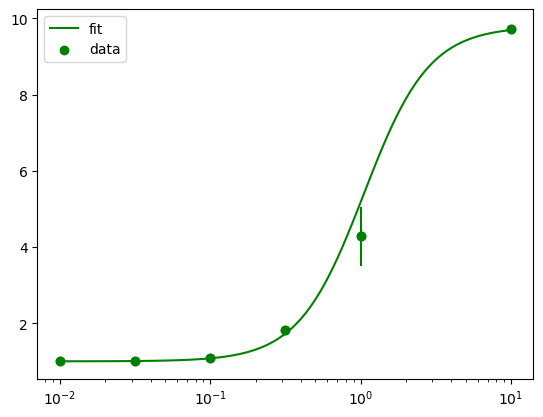

parametersred[20.          3.39290981 19.99965369  0.85104348]


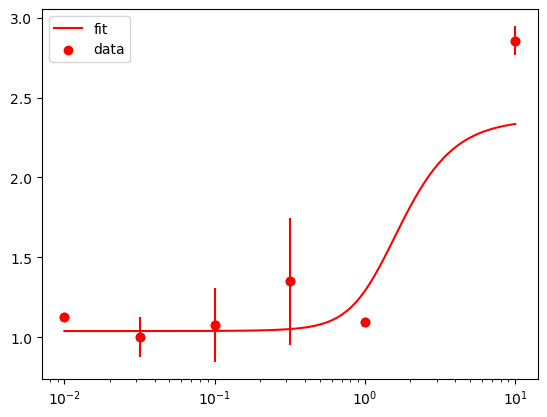

rfpFit = [1.0384171  1.03850071 1.03936623 1.05074749 1.2905962  2.3346915 ]
pfit [ 8.79023559  0.85467838 20.          3.39290981 19.99965369  0.85104348]


In [40]:
from scipy.optimize import curve_fit
OC14_list[0] = 1.00000000e-02

OC14_continuous = np.logspace(-2,1, 100)

def gfp_steadystate(OC14,  Vd,Kvd): 
    nvd=2
    muv = 0.0225 ; kv =  0.0183 ;
    D = 1 + Vd*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd ))
    return D

def bfp_steadystate(D,Vc,Kda):
    nda=2 
    C = 1 + Vc*(1/(1+((D/(Kda+1e-8))**nda)))
    # E = 1 + Ve*(1/(1+(Kfe/(F+1e-8))**nfe))

    # E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))

    return C

def rfp_steadystate(D,Vc, Kda,  Ve,Kce): 
    nce=2
    nda = 2
    E = 1 + Ve*(1/(1+((bfp_steadystate(D, Vc, Kda)/(Kce+1e-8))**nce)))
    # E = 1 + Ve*(1/(1+(Kfe/(F+1e-8))**nfe))

    # E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))

    return E



def steadystate(OC14,Vd, Kvd,nvd, Vc, Kda,nda,  Ve,Kce,nce):

    D= gfp_steadystate(OC14,  Vd,Kvd, nvd)
    E = rfp_steadystate(D,Vc, Kda,nda,  Ve,Kce, nce)
    return D,E




parametersgreen, covariancegfp = curve_fit(gfp_steadystate, OC14_list, gfpExp_list, p0=[ 7,5], bounds = (0,100), sigma=np.sqrt(semGreen.values), maxfev=1000000000)
# parametersgreen, covariancegfp = curve_fit(gfp_steadystate, OC14_list, gfpExp_list, p0=[ 7,5,2], bounds = (0,100), sigma=semGreen.values, maxfev=1000000000)
# parametersgreen, covariancegfp = curve_fit(rfp_steadystate, OC14_list, gfpExp_list[::-1], p0=[ 3,3], maxfev=1000000000)
print(f'parametersgreen{parametersgreen}')
gfpFit_continous = gfp_steadystate(OC14_continuous, *parametersgreen)
gfpFit = gfp_steadystate(OC14_list, *parametersgreen)
print(f'gfpFit = {gfpFit}')
plt.plot(OC14_continuous,gfpFit_continous , label='fit', c='green')
plt.scatter(OC14_list,gfpExp_list , label='data', c='green')
plt.errorbar(OC14_list,gfpExp_list,yerr=semGreen,c='green',fmt='o')
plt.xscale('log')
plt.legend()
plt.show()



parametersred, covariancerfp = curve_fit(rfp_steadystate, gfpFit, rfpExp_list,  p0=[1, 2,3, 10],bounds = (0,20), sigma = np.sqrt(semRed.values), maxfev=1000000000)
# parametersred, covariancerfp = curve_fit(rfp_steadystate, gfpFit, rfpExp_list,  p0=[1, 2,3, 100],bounds = (0,1000), sigma = semRed.values, maxfev=1000000000)
# parametersred, covariancerfp = curve_fit(rfp_steadystate, gfpFit, rfpExp_list,  p0=[10, 1],bounds = (0,100),  maxfev=1000000000)
print(f'parametersred{parametersred}')
rfpFit = rfp_steadystate(gfpFit, *parametersred)
rfpFit_continous = rfp_steadystate(gfpFit_continous, *parametersred)
plt.plot(OC14_continuous,rfpFit_continous , label='fit', c='red')
plt.scatter(OC14_list,rfpExp_list , label='data', c='red')
plt.errorbar(OC14_list,rfpExp_list,yerr=semRed,c='red',fmt='o')
plt.xscale('log')
plt.legend()
plt.show()
print(f'rfpFit = {rfpFit}')

pfit = np.concatenate((parametersgreen, parametersred))
print(f'pfit {pfit}')


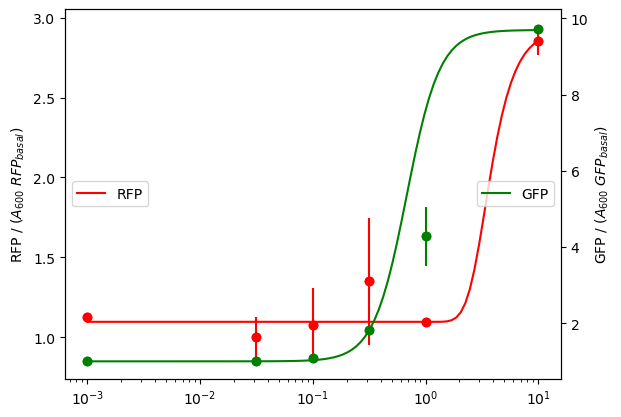

In [48]:
def plotFitvsData(inducer,inducer_continuous, gfpExp_list, rfpExp_list, semGreen, semRed,doseResponseGreen,doseResponseRed,pad=0.01):
    fig,ax = plt.subplots()

    ax.plot(inducer_continuous,doseResponseRed,label='RFP', c='red')
    ax.scatter(inducer,rfpExp_list, c='red')
    ax.errorbar(inducer,rfpExp_list,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    ax.set_ylabel('RFP / ($A_{600}$ $RFP_{basal})$')
    ax.set_xscale('log')


    ax2=ax.twinx()
    ax2.plot(inducer_continuous,doseResponseGreen,label='GFP', c='green')
    ax2.scatter(inducer,gfpExp_list, c='green')
    ax2.errorbar(inducer,gfpExp_list,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    ax2.set_ylabel('GFP / ($A_{600}$ $GFP_{basal})$')
    ax.set_xscale('log')


    plt.show()


# plotFitvsData(OC14_list,OC14_continuous, rfpExp_list, gfpExp_list, semRed, semGreen, rfpFit_continous,gfpFit_continous)
plotFitvsData(OC14_list,OC14_continuous, gfpExp_list, rfpExp_list, semGreen, semRed, gfpFit_continous,rfpFit_continous)

In [49]:
import jax

from jax.config import config
config.update("jax_debug_nans", True)


# OC14data_new = np.hstack([OC14_list,OC14_list])


def func(p):
    loss_i = 0

    for count,OC14 in enumerate(OC14_list):
      model = steadystate(OC14,*p)
   
      loss_i+= ((gfpExp_list[count] - model[0])**2 + (rfpExp_list[count] - model[1])**2)
      # loss_i+= (((gfpExp_list[count] - model[0])**2)/(semGreen.values[count]+1e-8)+ ((rfpExp_list[count] - model[1])**2)/(semRed.values[count]+1e-8))
      # loss_i+= (gfpExp_list[count] - model)**2
    
    return loss_i



p1,p2,p3,p4, p5, p6,p7,p8,p9= pfit
hesian = jax.hessian(func)(jax.numpy.array([p1, p2, p3, p4, p5, p6,p7,p8,p9]))
print('hesian')
print(hesian)
hesian = np.array(hesian)
## check if hesian is positive semidefinite (eig must be >0)
import scipy
scipy.linalg.eigvals(hesian)




hesian
[[ 9.9704816e+02 -3.6399139e+01  9.4492512e+00 -1.8986294e+01
  -9.9944208e+02  7.2435969e-01  5.9853811e+00  7.4426376e+01
  -3.4029545e+01]
 [-3.6399139e+01  1.2321108e+02 -1.4082631e+01  3.0941260e-01
   1.6287531e+01 -1.1804616e-02 -9.7541526e-02 -1.2128990e+00
   5.5456704e-01]
 [ 9.4492521e+00 -1.4082634e+01  6.4419824e-01 -1.5547089e-01
  -8.1840172e+00  5.9314817e-03  4.9011804e-02  6.0944676e-01
  -2.7865386e-01]
 [-1.8986290e+01  3.0941245e-01 -1.5547086e-01  3.6719424e-01
   1.9092464e+01 -1.3837814e-02 -1.1562205e-01 -1.4401367e+00
   6.7476720e-01]
 [-9.9944220e+02  1.6287531e+01 -8.1840172e+00  1.9092472e+01
   1.0050311e+03 -7.2841054e-01 -6.0188532e+00 -7.4842590e+01
   3.4219849e+01]
 [ 7.2435975e-01 -1.1804614e-02  5.9314817e-03 -1.3837817e-02
  -7.2841048e-01  5.2794715e-04  4.3623368e-03  5.4244317e-02
  -2.4801819e-02]
 [ 5.9853806e+00 -9.7541511e-02  4.9011804e-02 -1.1562205e-01
  -6.0188532e+00  4.3623364e-03  3.6529455e-02  4.5275125e-01
  -2.1045738e-01]

array([ 2.0084402e+03+0.j,  1.2568045e+02+0.j, -1.3429921e+00+0.j,
        2.9716036e-01+0.j,  1.7715611e-01+0.j, -4.7811228e-03+0.j,
        7.1100099e-04+0.j,  1.5817050e-04+0.j,  2.1311289e-08+0.j],
      dtype=complex64)

In [50]:
from scipy.stats import multivariate_normal
from tqdm import tqdm 
C14_continuous = np.logspace(-3,1,100)
covarianceM = np.linalg.inv(hesian)
var = multivariate_normal(mean=pfit, cov=1000*covarianceM)
pfit_hesian = var.rvs(size=100)

fig,ax = plt.subplots()
ax2=ax.twinx()
for p in tqdm(pfit_hesian):
    # if np.all(p>0):
    # steadystate(OC14_continuous, *p)
    ax.plot(OC14_continuous, steadystate(OC14_continuous, *p)[0], c='green', alpha=0.1)
    ax2.plot(OC14_continuous, steadystate(OC14_continuous, *p)[1], c='red', alpha=1)
    ax.scatter(OC14_list,gfpExp_list , label='data', c='green')
    ax2.scatter(OC14_list,rfpExp_list , label='data', c='red')
    plt.xscale('log')
        # print(func(p), p)
pfit_hesian

print(pfit)

ValueError: the input matrix must be positive semidefinite

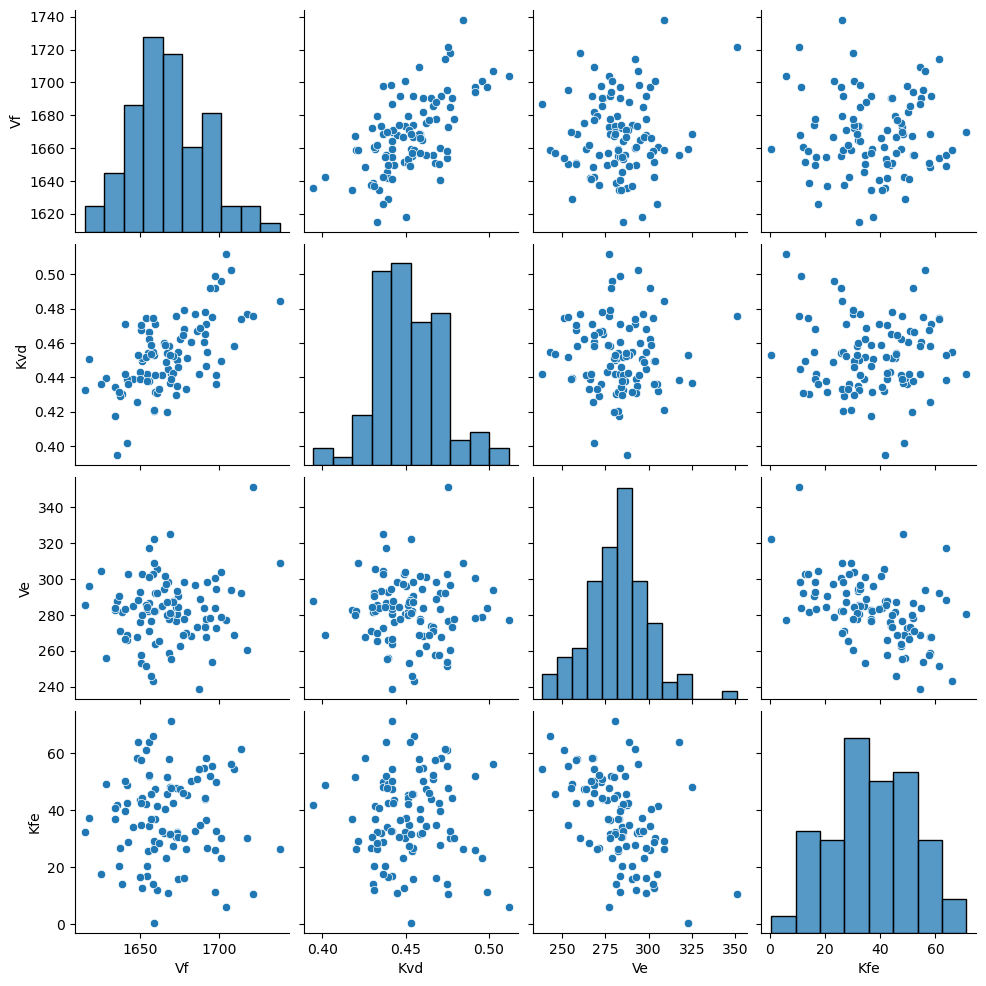

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame(pfit_hesian, columns=['Vf', 'Kvd', 'Ve', 'Kfe'])
sns.pairplot(df)

## Generate parameter set

In [68]:
#############
###paths#####
#############
import sys
import os




pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1]
sys.path.append(modellingpath + '/lib')
#############
from equations.parameterCreation_functions import *
#############
import numpy as np
import pandas as pd
import pickle as pkl
# %matplotlib inline
circuit_n=14
variant='1nd'
#diffusion parameters


#maximum production parameters (V*)
# V* = V/b
# V = 10-1000
# b=0.1-1
minV = 10;maxV=1000;minb=0.1;maxb=1
VA = {'name':'VA','distribution':'loguniform', 'min':minV/maxb, 'max':maxV/minb}
VB = {'name':'VB','distribution':'loguniform', 'min':minV/maxb, 'max':maxV/minb}
V_parameters = [VA,VB]



K1=0.0183; K2=0.0183
DUmin=0.1; DUmax=10; DVmin=0.1; DVmax=10
muU=0.0225; muV=0.0225
KdiffpromMin=0.1;KdiffpromMax=250
muLVA_estimate =1.143
muAAV_estimate =0.633
muASV_estimate=0.300 #this corresponds to mua

def Dr_(K1,K2,muU,muV,DU_,DV_):
    return (K2*DV_*muU)/(K1*DU_*muV)


def Kdiffstar(mudiff,Kdiffprom,kdiff):
    return mudiff*Kdiffprom/kdiff

def Kstar(mu,b,K):
    return mu/b*K

Dr = {'name':'Dr','distribution':'loguniform', 'min':Dr_(K1,K2,muU,muV,DUmax,DVmin), 'max':Dr_(K1,K2,muU,muV,DUmin,DVmax)}
D_parameters = [Dr]

#[] at half activation parameters (K)
minK=0.1;maxK=250

Keb = {'name':'Keb','distribution':'loguniform', 'min':Kstar(muLVA_estimate,maxb,minK), 'max':Kstar(muLVA_estimate,minb,maxK)}

Kee = {'name':'Kee','distribution':'fixed','value':0.001}

Kab = {'name':'Kab','distribution':'loguniform', 'min':Kdiffstar(muU,KdiffpromMin,K2), 'max':Kdiffstar(muU,KdiffpromMax,K2)}

# Kab = {'name':'Kab','distribution':'loguniform', 'min':muU_low*DU_low/k1, 'max':muU_high*DU_high/k1}
# Kbd = {'name':'Kbd','distribution':'loguniform', 'min':muV_low*DV_low/k2, 'max':muV_high*DV_high/k2}
K_parameters = [ Kab, Keb, Kee ]



#protein degradation parameters (mu)
# mu = mux/mua
muASV = {'name':'muASV','distribution':'fixed', 'value':muASV_estimate/muASV_estimate}
muLVA = {'name':'muLVA','distribution': 'gaussian','mean':muLVA_estimate /muASV_estimate, 'noisetosignal':0.1}
mu_parameters = [muLVA,muASV]


#cooperativity parameters (n)
nab = {'name':'nab','distribution':'fixed', 'value':1}
nee = {'name':'nee','distribution':'fixed', 'value':4}
neb = {'name':'neb','distribution':'fixed', 'value':4}
n_parameters = [nab,nee,neb]



plotDistributions=False
if plotDistributions == True:
    D_parameters = [Dr, Dr]
    nsamples=10000
    parameterTypeList = [ D_parameters  , V_parameters , K_parameters , mu_parameters , n_parameters]

    for parameterType in parameterTypeList:
        stackedDistributions = preLhs(parameterType)
        lhsDist = lhs(stackedDistributions,nsamples)
        lhsDist_df = pd.DataFrame(data = lhsDist, columns=[parameter['name'] for parameter in parameterType])
        plotDist(parameterType,lhsDist_df)

createParams=True
if createParams == True:
    nsamples=100
    # nsamples=int(sys.argv[1])
    # nsamples=14
    parameterDictList = D_parameters  + V_parameters + K_parameters + mu_parameters + n_parameters
    # parameterDictList = [DU, DV, bA, bB, bC, bD, bE, bF, VA, VB, VC, VD, VE, VF, Kbd, Kab, Kda, Kfe, Kee, Keb, Kce, KaTc, Kiptg, muLVA, muAAV, muASV, muUb, muVb, muaTc, muU, muV, nbd, nab, nda, nfe, nee, neb, nce, naTc, niptg, k1, k2, iptg]
    stackedDistributions = preLhs(parameterDictList)
    lhsDist = lhs(stackedDistributions,nsamples)
    lhsDist_df = pd.DataFrame(data = lhsDist, columns=[parameter['name'] for parameter in parameterDictList])
    # plotDist(parameterDictList,lhsDist_df)
    # pkl.dump(lhsDist_df, open(modellingpath + '/3954/paper/input/lhs_parameterfiles/df_circuit%r_variant%s_%rparametersets.pkl'%(circuit_n,variant,nsamples), 'wb'))

    print(lhsDist_df)


100%|██████████| 11/11 [00:00<00:00, 939.35it/s]

           Dr          VA          VB         Kab         Keb    Kee  \
0    9.455632   52.913223   96.355033    0.269729    1.343563  0.001   
1    0.044480   90.113368  555.166953    0.502570    1.164458  0.001   
2   60.167829   10.521531   21.928849   12.410532    0.487085  0.001   
3   44.605990  193.935342  143.716360    0.303112  555.931757  0.001   
4    0.026695  140.976495   27.548645    0.152967    7.462776  0.001   
..        ...         ...         ...         ...         ...    ...   
95   0.011386  302.196332   21.410405  122.012195    0.226857  0.001   
96  33.653300   83.833713  988.027274    4.889601   37.163023  0.001   
97   0.138402   15.124818   23.333034  259.373122    0.340960  0.001   
98  15.958872  241.086188  720.156039   87.859112    1.696359  0.001   
99   0.813346   16.780242  229.953645  109.301155  247.813356  0.001   

       muLVA  muASV  nab  nee  neb  
0   4.033120    1.0  1.0  4.0  4.0  
1   3.894236    1.0  1.0  4.0  4.0  
2   3.819985    1.0  1.0

In [74]:
lhsDist_df

pfit_df = pd.DataFrame(pfit_hesian, columns =['Vf', 'Kvd', 'Ve', 'Kfe'])
lhsDist_df=pd.concat([lhsDist_df, pfit_df], axis=1)
lhsDist_df

,Vf,Kvd,Ve,Kfe,Vf,Kvd,Ve,Kfe,Vf,Kvd,Ve,Kfe,Vf,Kvd,Ve,Kfe,Vf,Kvd,Ve,Kfe
0,5.265852,0.159245,-58.513273,1.834841,5.265852,0.159245,-58.513273,1.834841,5.265852,0.159245,-58.513273,1.834841,5.265852,0.159245,-58.513273,1.834841,5.265852,0.159245,-58.513273,1.834841
1,7.217592,0.905893,82.703736,-0.101920,7.217592,0.905893,82.703736,-0.101920,7.217592,0.905893,82.703736,-0.101920,7.217592,0.905893,82.703736,-0.101920,7.217592,0.905893,82.703736,-0.101920
2,5.460342,0.094034,-79.967366,2.160106,5.460342,0.094034,-79.967366,2.160106,5.460342,0.094034,-79.967366,2.160106,5.460342,0.094034,-79.967366,2.160106,5.460342,0.094034,-79.967366,2.160106
3,5.538206,0.662318,107.760131,-0.471929,5.538206,0.662318,107.760131,-0.471929,5.538206,0.662318,107.760131,-0.471929,5.538206,0.662318,107.760131,-0.471929,5.538206,0.662318,107.760131,-0.471929
4,6.983142,0.656793,24.993535,0.645618,6.983142,0.656793,24.993535,0.645618,6.983142,0.656793,24.993535,0.645618,6.983142,0.656793,24.993535,0.645618,6.983142,0.656793,24.993535,0.645618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.605050,0.148384,-72.830078,2.033187,5.605050,0.148384,-72.830078,2.033187,5.605050,0.148384,-72.830078,2.033187,5.605050,0.148384,-72.830078,2.033187,5.605050,0.148384,-72.830078,2.033187
96,5.416734,0.735860,32.318970,0.543390,5.416734,0.735860,32.318970,0.543390,5.416734,0.735860,32.318970,0.543390,5.416734,0.735860,32.318970,0.543390,5.416734,0.735860,32.318970,0.543390
97,6.430970,0.463819,33.491709,0.571197,6.430970,0.463819,33.491709,0.571197,6.430970,0.463819,33.491709,0.571197,6.430970,0.463819,33.491709,0.571197,6.430970,0.463819,33.491709,0.571197
98,6.577308,0.653454,35.073200,0.513763,6.577308,0.653454,35.073200,0.513763,6.577308,0.653454,35.073200,0.513763,6.577308,0.653454,35.073200,0.513763,6.577308,0.653454,35.073200,0.513763
